<a href="https://colab.research.google.com/github/atakanerdogn/My-Data-Analysis-Projects/blob/main/eeg_psychiatric_disorders%201%20without%20ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [181]:
df = pd.read_csv('/content/EEG.machinelearing_data_BRMH.csv.zip')
df.head()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [182]:
df.tail(3)

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
942,943,M,26.0,2014.9.27,16.0,113.0,Healthy control,Healthy control,28.781317,32.369230,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,944,M,24.0,2014.9.20,13.0,107.0,Healthy control,Healthy control,19.929100,25.196375,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446
944,945,M,21.0,2015.10.23,13.0,105.0,Healthy control,Healthy control,65.195346,69.241972,...,78.600293,68.255430,70.687410,74.433908,74.294750,53.254681,72.755265,47.810386,80.166825,64.380273


In [183]:
df.describe()

,no.,age,education,IQ,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
count,945.000000,945.000000,930.000000,932.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,...,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,473.000000,30.594804,13.438710,101.580472,20.182936,21.177584,17.749553,18.901698,20.447079,19.490329,...,75.889633,55.049113,56.959796,60.739169,69.829254,47.862489,66.832798,39.301406,66.153213,57.056207
std,272.942302,11.781592,2.550461,17.022414,11.282022,12.230662,10.003598,9.079482,9.742912,9.252500,...,15.861641,19.541956,18.326785,18.052887,17.725321,19.685722,17.028701,20.790933,18.088548,19.600107
min,1.000000,18.000000,0.000000,49.000000,3.272260,3.244199,3.050507,3.412618,5.066593,4.048931,...,12.611954,0.519048,6.926792,0.708008,2.421748,0.036664,1.032207,1.228502,0.363268,3.988805
25%,237.000000,21.730000,12.000000,91.000000,12.784872,13.019269,11.134327,12.460586,13.548645,12.637717,...,68.014443,41.607506,43.682444,48.374883,58.937785,32.581046,55.872070,22.049743,54.710605,43.955229
50%,473.000000,26.150000,13.000000,102.000000,17.065286,17.838251,15.541469,16.733004,18.065276,17.432568,...,78.647712,55.158858,56.657348,61.257972,72.298636,45.719426,68.238375,36.549938,67.988937,57.515871
75%,709.000000,35.450000,16.000000,114.000000,24.492760,25.654394,21.623961,23.347900,25.573096,23.956748,...,87.398387,69.740640,70.649245,73.979100,83.066877,62.081839,79.192418,54.169209,79.527764,71.626382
max,945.000000,71.880000,20.000000,145.000000,92.826192,101.515687,91.373456,82.544167,101.566662,77.197502,...,99.678649,100.000000,99.307895,100.000000,99.581629,98.720067,99.650154,98.413320,100.000000,99.287092


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Columns: 1149 entries, no. to COH.F.gamma.r.O1.s.O2
dtypes: float64(1144), int64(1), object(4)
memory usage: 8.3+ MB


In [185]:
df.shape

(945, 1149)

In [186]:
df.columns

Index(['no.', 'sex', 'age', 'eeg.date', 'education', 'IQ', 'main.disorder',
       'specific.disorder', 'AB.A.delta.a.FP1', 'AB.A.delta.b.FP2',
       ...
       'COH.F.gamma.o.Pz.p.P4', 'COH.F.gamma.o.Pz.q.T6',
       'COH.F.gamma.o.Pz.r.O1', 'COH.F.gamma.o.Pz.s.O2',
       'COH.F.gamma.p.P4.q.T6', 'COH.F.gamma.p.P4.r.O1',
       'COH.F.gamma.p.P4.s.O2', 'COH.F.gamma.q.T6.r.O1',
       'COH.F.gamma.q.T6.s.O2', 'COH.F.gamma.r.O1.s.O2'],
      dtype='object', length=1149)

In [187]:
df.drop('no.', axis=1
        )

,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,21.518280,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,11.942516,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,17.150159,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,17.364316,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,21.865556,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,M,22.0,2014.8.28,13.0,116.0,Healthy control,Healthy control,41.851823,36.771496,43.671792,...,82.905657,34.850706,63.970519,63.982003,51.244725,62.203684,62.062237,31.013031,31.183413,98.325230
941,M,26.0,2014.9.19,13.0,118.0,Healthy control,Healthy control,18.986856,19.401387,27.586436,...,65.917918,66.700117,44.756285,49.787513,98.905995,54.021304,93.902401,52.740396,92.807331,56.320868
942,M,26.0,2014.9.27,16.0,113.0,Healthy control,Healthy control,28.781317,32.369230,11.717778,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,M,24.0,2014.9.20,13.0,107.0,Healthy control,Healthy control,19.929100,25.196375,14.445391,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446


In [188]:
df.isnull().sum()

,0
no.,0
sex,0
age,0
eeg.date,0
education,15
...,...
COH.F.gamma.p.P4.r.O1,0
COH.F.gamma.p.P4.s.O2,0
COH.F.gamma.q.T6.r.O1,0
COH.F.gamma.q.T6.s.O2,0


In [189]:
df.isna().sum()

,0
no.,0
sex,0
age,0
eeg.date,0
education,15
...,...
COH.F.gamma.p.P4.r.O1,0
COH.F.gamma.p.P4.s.O2,0
COH.F.gamma.q.T6.r.O1,0
COH.F.gamma.q.T6.s.O2,0


In [190]:
df_n = df.select_dtypes(include=np.number)
df_n.head(3)

,no.,age,education,IQ,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,57.0,NaN,NaN,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,37.0,6.0,120.0,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,32.0,16.0,113.0,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799


In [191]:
df_n.dropna(inplace=True)

In [192]:
df_n.isna().sum()

,0
no.,0
age,0
education,0
IQ,0
AB.A.delta.a.FP1,0
...,...
COH.F.gamma.p.P4.r.O1,0
COH.F.gamma.p.P4.s.O2,0
COH.F.gamma.q.T6.r.O1,0
COH.F.gamma.q.T6.s.O2,0


In [193]:
len(df.columns)

1149

In [194]:
# select patients iq greater than 120
selected_patients = df[df['IQ']>120]
print(selected_patients)

     no. sex   age    eeg.date  education     IQ       main.disorder  \
3      4   M  35.0   2012.10.8       18.0  126.0  Addictive disorder   
20    21   M  39.0  2013.12.27       12.0  128.0  Addictive disorder   
24    25   M  29.0   2014.7.25       13.0  122.0  Addictive disorder   
25    26   M  32.0   2014.9.19       16.0  130.0  Addictive disorder   
26    27   M  34.0   2014.9.25       13.0  122.0  Addictive disorder   
..   ...  ..   ...         ...        ...    ...                 ...   
934  935   M  23.0   2014.6.26       13.0  131.0     Healthy control   
935  936   M  27.0   2014.4.14       16.0  122.0     Healthy control   
936  937   M  23.0   2014.4.14       13.0  123.0     Healthy control   
937  938   M  26.0   2014.4.18       16.0  127.0     Healthy control   
938  939   M  29.0   2014.4.16       18.0  130.0     Healthy control   

        specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  ...  \
3    Alcohol use disorder         21.496226         21.846832  ..

In [195]:
df_c= df.select_dtypes(include='object')
df_c.head(3)

,sex,eeg.date,main.disorder,specific.disorder
0,M,2012.8.30,Addictive disorder,Alcohol use disorder
1,M,2012.9.6,Addictive disorder,Alcohol use disorder
2,M,2012.9.10,Addictive disorder,Alcohol use disorder


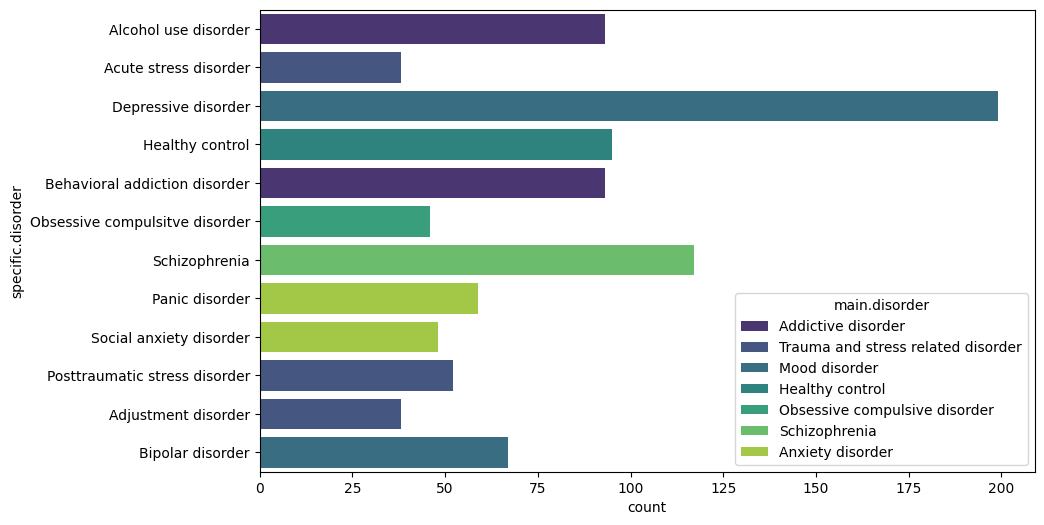

In [196]:
# main disorder and specific disorder // general public
plt.figure(figsize=(10,6))
sns.countplot(y='specific.disorder', hue='main.disorder', data = df_c, palette='viridis')
plt.show()

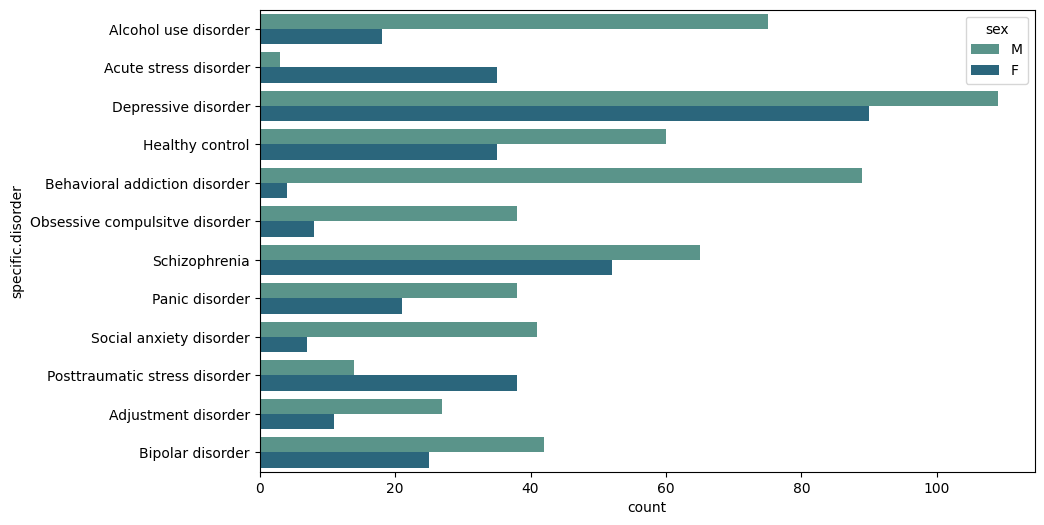

In [197]:
# according to sex  // general public

plt.figure(figsize=(10,6))
sns.countplot(y='specific.disorder', hue='sex', data=df_c, palette='crest')
plt.show()

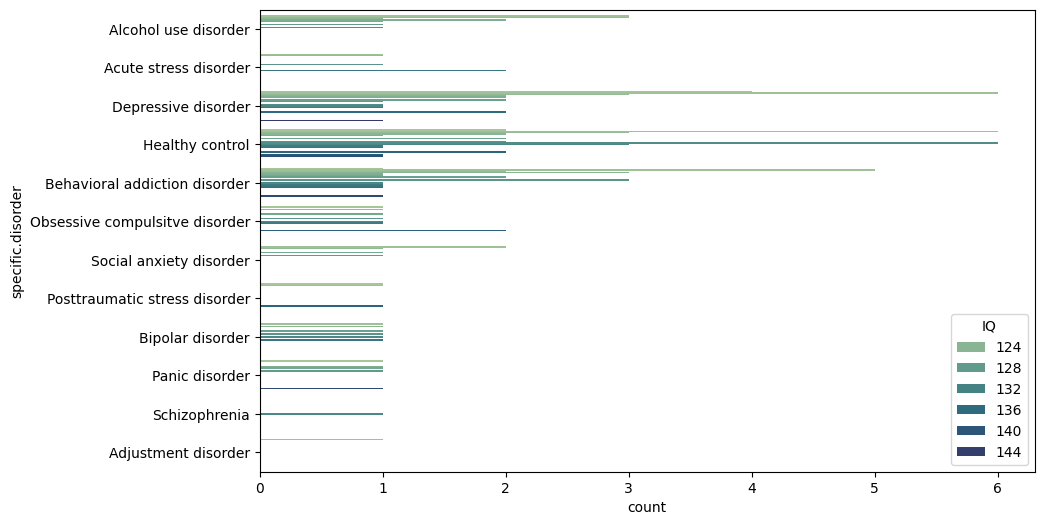

In [198]:
# specific disorders // with over 120 iq

plt.figure(figsize=(10,6))
sns.countplot(y='specific.disorder', hue='IQ', data=selected_patients, palette='crest')
plt.show()

In [199]:
df = df.rename(columns={'main.disorder': 'main_disorder', 'specific.disorder': 'specific_disorder'})
df['specific_disorder'].head()


,specific_disorder
0,Alcohol use disorder
1,Alcohol use disorder
2,Alcohol use disorder
3,Alcohol use disorder
4,Alcohol use disorder


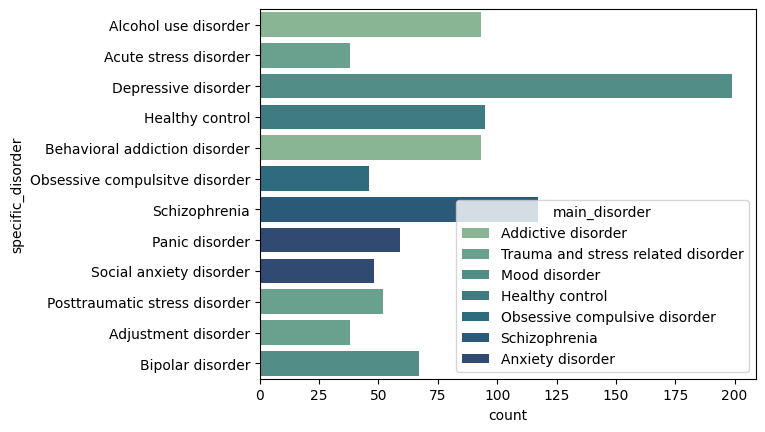

In [202]:
# for patients with iq greater than 120
sns.countplot(y='specific_disorder', hue='main_disorder', data=df, palette='crest')
plt.show()

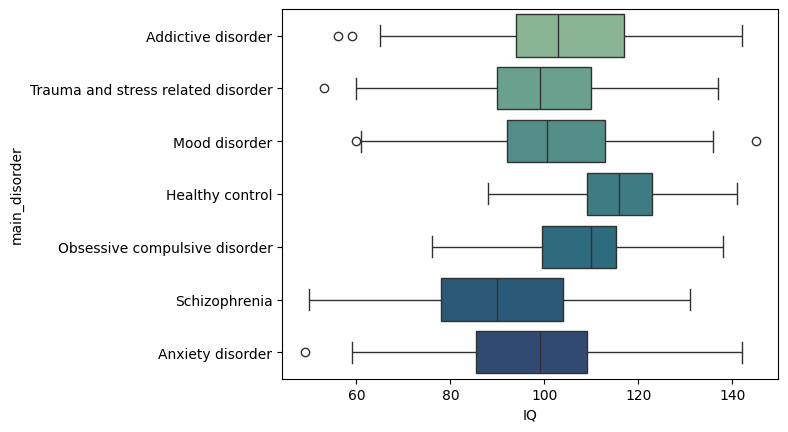

In [204]:
sns.boxplot(x='IQ', y='main_disorder', data=df, palette='crest')
plt.show()

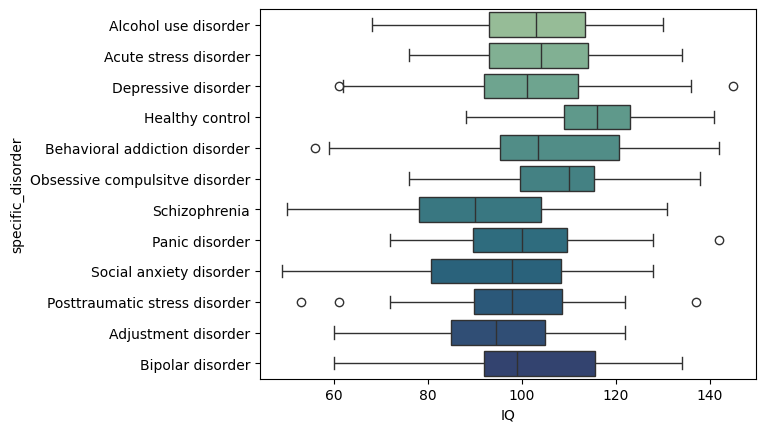

In [206]:
sns.boxplot(x='IQ', y='specific_disorder', data=df, palette='crest')
plt.show()

In [207]:

alcoholic_patients = df[df['specific_disorder'] == 'Alcohol use disorder']
alcoholic_patients.sample(50
                          )


,no.,sex,age,eeg.date,education,IQ,main_disorder,specific_disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
11,12,M,32.00,2013.3.8,12.0,93.0,Addictive disorder,Alcohol use disorder,26.103685,26.800251,...,90.440081,72.276539,76.953847,74.134910,85.531664,69.081987,82.244258,59.842449,79.882000,74.887129
1,2,M,37.00,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
680,681,M,46.03,2018.2.19,16.0,100.0,Addictive disorder,Alcohol use disorder,22.151095,14.738811,...,83.287944,49.082046,46.831100,58.569189,72.617089,33.637683,70.158648,17.578464,61.863595,37.172209
75,76,M,25.00,2017.5.24,12.0,99.0,Addictive disorder,Alcohol use disorder,14.838166,16.509008,...,51.292403,25.954840,30.097940,35.924008,65.452535,14.164692,46.608077,8.066409,51.373129,30.754972
26,27,M,34.00,2014.9.25,13.0,122.0,Addictive disorder,Alcohol use disorder,35.108163,42.887813,...,88.886854,66.456432,83.580911,84.729349,83.011406,72.474619,89.339753,54.381208,78.826373,78.385065
876,877,F,54.52,2018.6.22,6.0,68.0,Addictive disorder,Alcohol use disorder,17.581980,17.776402,...,77.398455,48.282117,73.185133,66.742485,49.466312,59.270167,66.639938,40.297206,55.547526,63.630547
15,16,M,20.00,2013.4.25,12.0,93.0,Addictive disorder,Alcohol use disorder,16.620070,14.605465,...,83.445661,66.572274,56.069041,62.850757,79.941280,48.959174,67.228130,44.555296,68.710939,54.006263
63,64,M,29.00,2016.6.2,14.0,105.0,Addictive disorder,Alcohol use disorder,13.886665,13.433123,...,70.123868,48.021413,56.888940,55.626517,58.693748,56.607312,61.546724,40.030107,46.812355,56.547807
84,85,F,20.00,2016.12.16,13.0,91.0,Addictive disorder,Alcohol use disorder,7.104149,5.323974,...,69.176918,45.119814,56.686578,59.244349,66.922586,57.673531,74.853986,45.027921,67.134456,71.391069
28,29,M,25.00,2014.11.24,13.0,117.0,Addictive disorder,Alcohol use disorder,48.201960,30.871692,...,96.032677,85.511285,84.335039,87.923909,92.488775,80.718027,89.395883,73.228015,88.262535,82.852421


In [208]:
df['specific_disorder'].value_counts()

,count
specific_disorder,
Depressive disorder,199
Schizophrenia,117
Healthy control,95
Alcohol use disorder,93
Behavioral addiction disorder,93
Bipolar disorder,67
Panic disorder,59
Posttraumatic stress disorder,52
Social anxiety disorder,48


In [209]:
addictive_disorder = df[df['main_disorder'] == 'Addictive disorder']
addictive = addictive_disorder.sample(50)
addictive.head()


,no.,sex,age,eeg.date,education,IQ,main_disorder,specific_disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
63,64,M,29.00,2016.6.2,14.0,105.0,Addictive disorder,Alcohol use disorder,13.886665,13.433123,...,70.123868,48.021413,56.888940,55.626517,58.693748,56.607312,61.546724,40.030107,46.812355,56.547807
238,239,M,21.00,2017.12.15,12.0,96.0,Addictive disorder,Behavioral addiction disorder,19.582317,19.361081,...,78.297687,56.894715,69.623177,72.244121,72.885966,57.239452,77.307642,49.572620,70.634383,73.487023
227,228,M,23.00,2016.11.1,12.0,111.0,Addictive disorder,Behavioral addiction disorder,18.126443,15.285563,...,53.654495,46.557247,56.058404,52.232845,38.967658,29.303169,34.147630,32.671899,49.169914,62.607522
907,908,M,29.97,2018.6.25,12.0,75.0,Addictive disorder,Behavioral addiction disorder,21.344131,16.080218,...,75.063383,65.242203,73.581550,70.873000,76.998395,46.336504,62.474653,45.392215,72.309989,58.206101
64,65,M,23.00,2016.5.26,16.0,101.0,Addictive disorder,Alcohol use disorder,14.177352,13.939398,...,72.168070,59.235392,68.060937,59.584957,71.261016,59.390737,65.879927,53.848733,77.390550,61.077926


In [210]:
df_c.columns

Index(['sex', 'eeg.date', 'main.disorder', 'specific.disorder'], dtype='object')

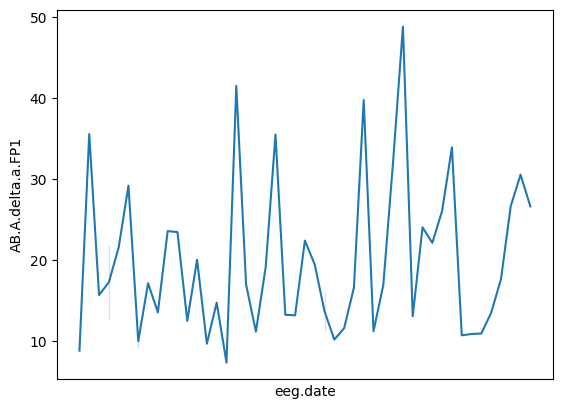

In [211]:
df2 = df.sample(50)
sns.lineplot(x='eeg.date', y='AB.A.delta.a.FP1', data=df2, palette='crest')
plt.xticks([])
plt.show()

In [212]:
schizophrenia = df[df['main_disorder'] == 'Schizophrenia']
schizophrenia.head()

,no.,sex,age,eeg.date,education,IQ,main_disorder,specific_disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
283,284,M,29.22,2012.1.11,16.0,102.0,Schizophrenia,Schizophrenia,13.533164,14.711985,...,66.019853,43.970020,46.364561,51.988403,58.615577,36.998060,55.852831,30.335654,54.374133,47.250159
290,291,M,18.77,2013.4.22,12.0,95.0,Schizophrenia,Schizophrenia,7.970252,7.266967,...,64.171960,70.035610,60.114549,56.457333,62.986150,44.837748,51.857004,53.691281,62.306837,48.211705
291,292,M,24.53,2011.1.17,15.0,114.0,Schizophrenia,Schizophrenia,8.269064,10.083543,...,62.572653,41.940265,34.265888,51.330723,63.553482,24.377419,59.216170,11.659469,62.701330,28.049332
292,293,F,23.28,2011.1.10,16.0,94.0,Schizophrenia,Schizophrenia,24.920269,23.793912,...,75.048447,36.701346,40.122985,51.511086,40.950687,45.449571,63.396844,17.737763,29.802046,49.315534
298,299,M,56.51,2011.2.14,12.0,97.0,Schizophrenia,Schizophrenia,22.115575,19.107165,...,70.981709,38.617658,31.883457,37.845721,53.874866,33.885331,47.987555,24.885383,50.268147,48.232344


In [213]:
depression = df[df['specific_disorder'] == 'Depressive disorder']
depression.head()

,no.,sex,age,eeg.date,education,IQ,main_disorder,specific_disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
89,90,F,32.87,2015.9.21,16.0,108.0,Mood disorder,Depressive disorder,12.159137,13.113503,...,65.408894,59.590594,77.310851,75.280467,57.311188,48.015594,59.579033,68.503920,82.885151,86.986191
90,91,F,20.24,2016.12.9,12.0,127.0,Mood disorder,Depressive disorder,12.404484,9.737819,...,84.366954,53.402639,60.535899,73.838548,72.298636,43.330485,71.298037,23.109295,62.098128,67.749204
91,92,F,19.89,2015.10.21,13.0,113.0,Mood disorder,Depressive disorder,16.573145,15.586708,...,62.681353,20.062716,36.041763,36.436509,47.491240,20.875426,53.747615,8.009907,50.202188,33.647889
92,93,F,39.18,2017.3.3,16.0,NaN,Mood disorder,Depressive disorder,26.650019,22.823161,...,86.582363,83.045735,85.752150,85.875624,86.286859,79.520327,84.541455,82.452224,86.950905,87.384296
93,94,F,28.42,2017.3.20,9.0,NaN,Mood disorder,Depressive disorder,14.624474,14.277301,...,85.309981,58.218838,61.211830,65.038486,76.899037,49.849540,71.791429,39.910653,82.739819,62.285969


In [214]:
ptsd = df[df['specific_disorder'] == 'Posttraumatic stress disorder']
ptsd.head()

,no.,sex,age,eeg.date,education,IQ,main_disorder,specific_disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
297,298,F,36.62,2011.1.28,12.0,99.0,Trauma and stress related disorder,Posttraumatic stress disorder,17.603385,17.243334,...,94.727123,73.994841,75.159075,72.479599,81.756815,74.578657,78.980627,60.508215,65.113378,69.238767
309,310,F,55.21,2012.4.9,16.0,120.0,Trauma and stress related disorder,Posttraumatic stress disorder,21.714048,19.579805,...,83.821476,61.617403,63.964423,73.096645,74.161249,50.432291,77.440228,35.794362,70.592405,48.283439
310,311,F,26.93,2011.3.24,16.0,116.0,Trauma and stress related disorder,Posttraumatic stress disorder,13.371076,14.028142,...,70.585726,63.864062,46.127953,65.675414,62.455949,33.114945,56.163998,37.477109,72.732968,46.665464
315,316,M,26.71,2012.7.3,17.0,137.0,Trauma and stress related disorder,Posttraumatic stress disorder,30.473244,13.954586,...,87.768539,71.799769,65.845016,67.734909,78.328065,58.141474,68.113967,53.391012,71.111448,67.598506
318,319,F,23.45,2014.6.2,12.0,89.0,Trauma and stress related disorder,Posttraumatic stress disorder,18.488575,19.603144,...,70.188502,27.698816,24.181746,34.445899,47.797466,20.737129,47.210870,11.104500,50.442443,36.952529


In [215]:
df_c.columns

Index(['sex', 'eeg.date', 'main.disorder', 'specific.disorder'], dtype='object')

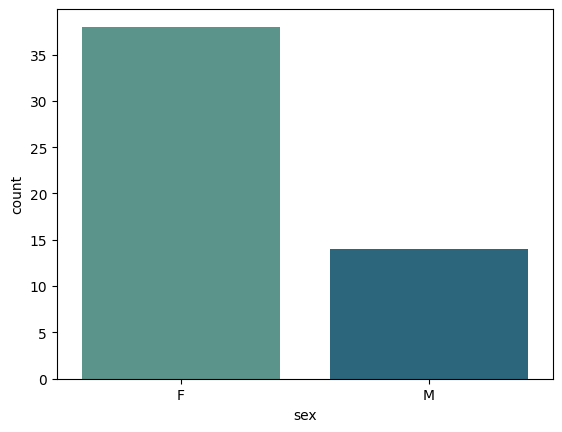

In [216]:
sns.countplot(x='sex',data =ptsd, palette='crest')
plt.show()

In [217]:
iq = df[df['IQ']>120]
iq.head()

,no.,sex,age,eeg.date,education,IQ,main_disorder,specific_disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
20,21,M,39.0,2013.12.27,12.0,128.0,Addictive disorder,Alcohol use disorder,18.594568,17.020998,...,66.150793,43.733591,46.345936,43.451396,68.070934,34.620592,53.303624,26.108450,55.758419,41.950959
24,25,M,29.0,2014.7.25,13.0,122.0,Addictive disorder,Alcohol use disorder,28.266495,23.889259,...,81.612432,70.077831,75.798940,79.070644,75.923721,65.461649,80.722845,68.595564,84.772493,81.399830
25,26,M,32.0,2014.9.19,16.0,130.0,Addictive disorder,Alcohol use disorder,23.862238,25.011723,...,68.531282,21.546621,34.445536,55.440919,53.185026,30.162870,54.648530,9.405020,36.735498,36.308812
26,27,M,34.0,2014.9.25,13.0,122.0,Addictive disorder,Alcohol use disorder,35.108163,42.887813,...,88.886854,66.456432,83.580911,84.729349,83.011406,72.474619,89.339753,54.381208,78.826373,78.385065


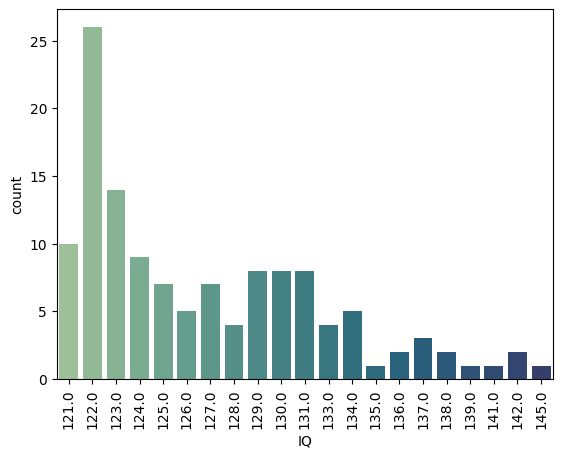

In [218]:
sns.countplot(x='IQ', data=iq, palette='crest')
plt.xticks(rotation=90)
plt.show()

In [222]:
# depression and ptsd
depression.head(
)

,no.,sex,age,eeg.date,education,IQ,main_disorder,specific_disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
89,90,F,32.87,2015.9.21,16.0,108.0,Mood disorder,Depressive disorder,12.159137,13.113503,...,65.408894,59.590594,77.310851,75.280467,57.311188,48.015594,59.579033,68.503920,82.885151,86.986191
90,91,F,20.24,2016.12.9,12.0,127.0,Mood disorder,Depressive disorder,12.404484,9.737819,...,84.366954,53.402639,60.535899,73.838548,72.298636,43.330485,71.298037,23.109295,62.098128,67.749204
91,92,F,19.89,2015.10.21,13.0,113.0,Mood disorder,Depressive disorder,16.573145,15.586708,...,62.681353,20.062716,36.041763,36.436509,47.491240,20.875426,53.747615,8.009907,50.202188,33.647889
92,93,F,39.18,2017.3.3,16.0,NaN,Mood disorder,Depressive disorder,26.650019,22.823161,...,86.582363,83.045735,85.752150,85.875624,86.286859,79.520327,84.541455,82.452224,86.950905,87.384296
93,94,F,28.42,2017.3.20,9.0,NaN,Mood disorder,Depressive disorder,14.624474,14.277301,...,85.309981,58.218838,61.211830,65.038486,76.899037,49.849540,71.791429,39.910653,82.739819,62.285969


In [221]:
ptsd.head()

,no.,sex,age,eeg.date,education,IQ,main_disorder,specific_disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
297,298,F,36.62,2011.1.28,12.0,99.0,Trauma and stress related disorder,Posttraumatic stress disorder,17.603385,17.243334,...,94.727123,73.994841,75.159075,72.479599,81.756815,74.578657,78.980627,60.508215,65.113378,69.238767
309,310,F,55.21,2012.4.9,16.0,120.0,Trauma and stress related disorder,Posttraumatic stress disorder,21.714048,19.579805,...,83.821476,61.617403,63.964423,73.096645,74.161249,50.432291,77.440228,35.794362,70.592405,48.283439
310,311,F,26.93,2011.3.24,16.0,116.0,Trauma and stress related disorder,Posttraumatic stress disorder,13.371076,14.028142,...,70.585726,63.864062,46.127953,65.675414,62.455949,33.114945,56.163998,37.477109,72.732968,46.665464
315,316,M,26.71,2012.7.3,17.0,137.0,Trauma and stress related disorder,Posttraumatic stress disorder,30.473244,13.954586,...,87.768539,71.799769,65.845016,67.734909,78.328065,58.141474,68.113967,53.391012,71.111448,67.598506
318,319,F,23.45,2014.6.2,12.0,89.0,Trauma and stress related disorder,Posttraumatic stress disorder,18.488575,19.603144,...,70.188502,27.698816,24.181746,34.445899,47.797466,20.737129,47.210870,11.104500,50.442443,36.952529


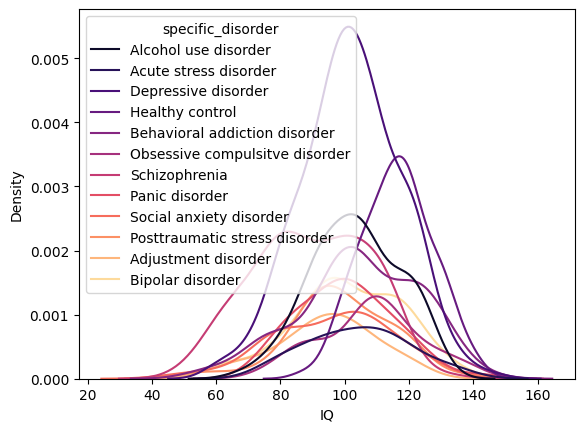

In [224]:
sns.kdeplot(x='IQ', hue='specific_disorder', data=df, palette='magma')
plt.show()

In [225]:
df_c.columns

Index(['sex', 'eeg.date', 'main.disorder', 'specific.disorder'], dtype='object')

In [226]:
df_n.columns


Index(['no.', 'age', 'education', 'IQ', 'AB.A.delta.a.FP1', 'AB.A.delta.b.FP2',
       'AB.A.delta.c.F7', 'AB.A.delta.d.F3', 'AB.A.delta.e.Fz',
       'AB.A.delta.f.F4',
       ...
       'COH.F.gamma.o.Pz.p.P4', 'COH.F.gamma.o.Pz.q.T6',
       'COH.F.gamma.o.Pz.r.O1', 'COH.F.gamma.o.Pz.s.O2',
       'COH.F.gamma.p.P4.q.T6', 'COH.F.gamma.p.P4.r.O1',
       'COH.F.gamma.p.P4.s.O2', 'COH.F.gamma.q.T6.r.O1',
       'COH.F.gamma.q.T6.s.O2', 'COH.F.gamma.r.O1.s.O2'],
      dtype='object', length=1145)

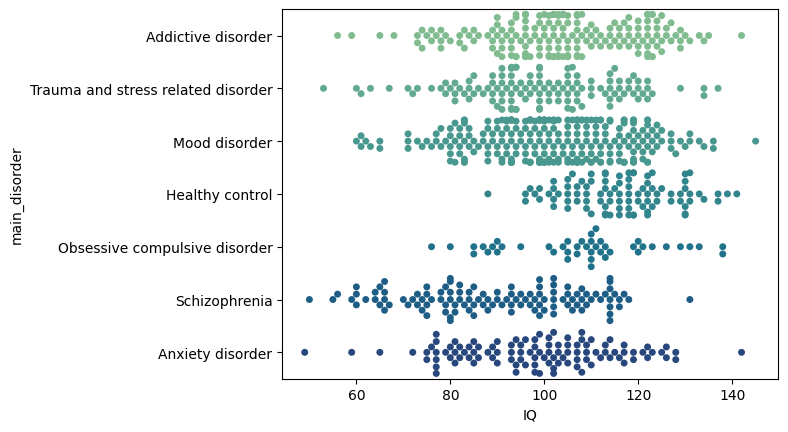

In [227]:
sns.swarmplot(x='IQ', y='main_disorder', data=df, palette='crest')
plt.show()

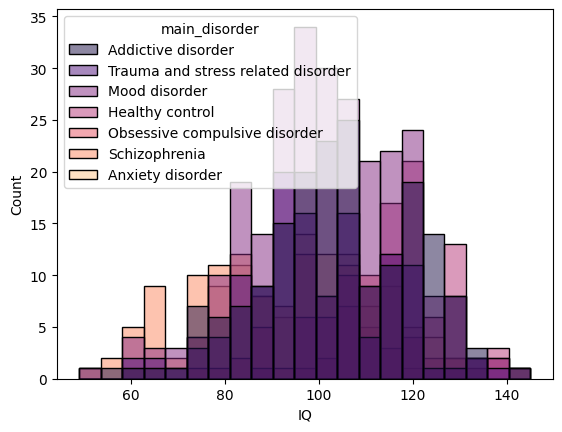

In [229]:
sns.histplot(x='IQ', hue='main_disorder', data=df, palette='magma')
plt.show()

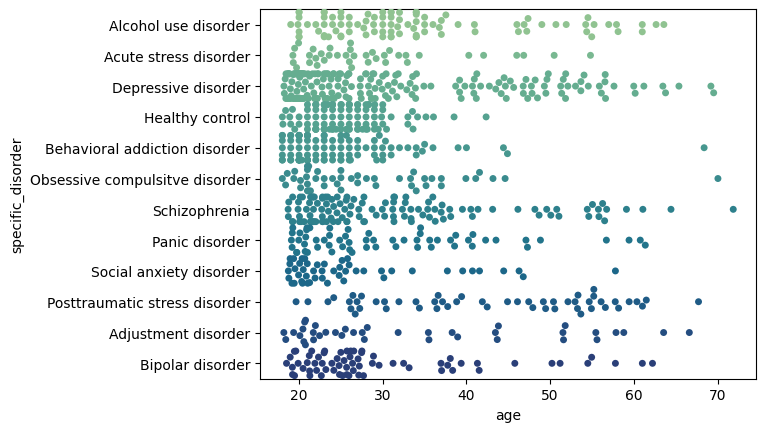

In [231]:
sns.swarmplot(x='age', y='specific_disorder', data=df, palette='crest')
plt.show()

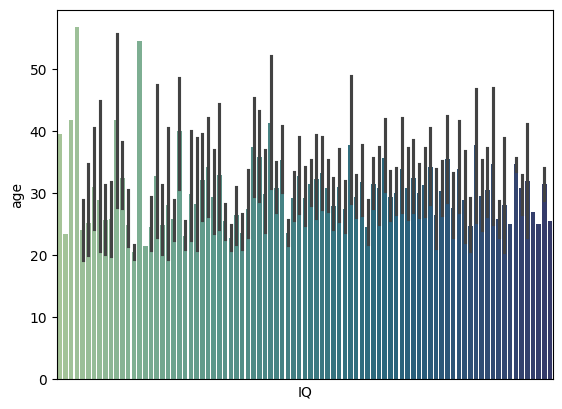

In [234]:
sns.barplot(y='age', x='IQ', data=df, palette='crest')
plt.xticks([])
plt.show()